In [1]:
from datetime import date
import pandas as pd
import os
import glob
import pycytominer
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2 

In [2]:
# load custom collection of functions
import sys
sys.path.append('/home/schmiedc/FMP_Docs/Projects/Bioactives_data/notebooks/')
import utility_functions as UTIL

In [3]:
parent_directory = "/home/schmiedc/FMP_Docs/Projects/Bioactives_data/"

input_path = parent_directory + "results/"
output_path = input_path

figure_path = parent_directory + "figures/"

In [4]:
# data_HepG2_Norm = pd.read_csv(input_path + "2023-04-11_Bioactives_HepG2_norm.csv")
file_HepG2_type = '/*[0-9]_' + 'IMTM_HepG2_norm.csv'
files_HepG2 = glob.glob(input_path + file_HepG2_type)

### gets latest file
max_file_HepG2 = max(files_HepG2, key=os.path.getctime)

### load file
data_HepG2_Norm = pd.read_csv(max_file_HepG2)
data_HepG2_Norm.shape

(10668, 2984)

# Feature Selection

Modified from Carsten Beese

Variance frequency cut off 0.1

Variance unique cut off 0.1

Outlier cut off 100


Modified:
Corr Treshold 0.9

In [5]:
# HepG2 feature reduction
print("Feature reduction with correlation threshold 0.9 and Outlier threshold 100")
HepG2_Reduced_Carsten_100_Mod = UTIL.feature_reduction(data_HepG2_Norm, 
                                         variance_freq_cut=0.1, 
                                         variance_unique_cut=0.1, 
                                         outlier_cutoff=100, 
                                         corr_threshold = 0.9, 
                                         print_stats = True)

Feature reduction with correlation threshold 0.9 and Outlier threshold 100
| Category           |   Original Features |   Variance Threshold |   % Variance |   Outlier Threshold |   % Outlier |   Correlation Threshold |   % Correlation |
|:-------------------|--------------------:|---------------------:|-------------:|--------------------:|------------:|------------------------:|----------------:|
| Total Features     |                2977 |                 2808 |         94.3 |                2218 |        74.5 |                     630 |            21.2 |
| Intensity          |                 180 |                  180 |        100   |                 172 |        95.6 |                      58 |            32.2 |
| Correlation        |                 180 |                  124 |         68.9 |                  97 |        53.9 |                      70 |            38.9 |
| AreaShape          |                 162 |                  153 |         94.4 |                 119 |      

# Consensus Feature reduction

In [6]:
## gets feature vector
Features_HepG2_Reduced_Carsten_100_Mod = UTIL.get_feature_vector(HepG2_Reduced_Carsten_100_Mod)
Features_HepG2_Reduced_Carsten_100_Mod.append("Metadata_Object_Count") 


HepG2_Norm_Reduced_Median = pycytominer.consensus(
        profiles = HepG2_Reduced_Carsten_100_Mod, # A file or pandas DataFrame of profile data
        replicate_columns = ["Metadata_EOS", "Metadata_Plate", "Metadata_Concentration", "Metadata_Partner"], # Metadata columns indicating which replicates to collapse, defaults to [“Metadata_Plate”, “Metadata_Well”]
        operation = "median", # (str) – The method used to form consensus profiles, defaults to “median”
        features = Features_HepG2_Reduced_Carsten_100_Mod, # (str, list) – The features to collapse, defaults to “infer”
)

In [7]:
# Moves position of Metadata_Object_Count column
HepG2_column_to_move = HepG2_Norm_Reduced_Median.pop("Metadata_Object_Count")
HepG2_Norm_Reduced_Median.insert(4, "Metadata_Object_Count", HepG2_column_to_move)

# Create Feature annotation for Profile Viz

In [8]:
HepG2_Norm_Reduced_Median_copy = HepG2_Norm_Reduced_Median.copy()
HepG2_Norm_Reduced_Median_copy.columns = HepG2_Norm_Reduced_Median_copy.columns.str.split('_', expand=True, n=2)
HepG2_Norm_Reduced_Median_copy.head()

Metadata                                                       Nuc  \
       EOS  Plate Concentration Partner  Object            AreaShape   
       NaN    NaN           NaN     NaN   Count BoundingBoxMinimum_X   
0     DMSO  B1001             0    IMTM  1374.0                  0.0   
1     DMSO  B1002             0    IMTM  1353.0                  0.0   
2     DMSO  B1003             0    IMTM  1469.0                  0.0   
3     DMSO  B1004             0    IMTM  1224.5                  0.0   
4     DMSO  B1005             0    IMTM  1681.5                  0.0   

                                                  ...  \
                                                  ...   
  Eccentricity Extent FormFactor MajorAxisLength  ...   
0          0.0    0.0        0.0    9.998946e-15  ...   
1          0.0    0.0        0.0    0.000000e+00  ...   
2          0.0    0.0        0.0    0.000000e+00  ...   
3          0.0    0.0        0.0    7.550004e-15  ...   
4          0.0    0.0        0.0    8.050852e-15  ...   

                                  Cyto                                       \
                               Texture                                        
  InverseDifferenceMoment_ER_10_00_256 InverseDifferenceMoment_ER_10_01_256   
0                        -2.050009e-15                        -2.349683e-15   
1                         0.000000e+00                         0.000000e+00   
2                         0.000000e+00                        -2.550044e-15   
3                         0.000000e+00                         1.600066e-15   
4                         0.000000e+00                         0.000000e+00   

                                                                             \
                                                                              
  InverseDifferenceMoment_ER_10_02_256 InverseDifferenceMoment_ER_10_03_256   
0                         0.000000e+00                        -1.400356e-15   
1                         2.249936e-15                         0.000000e+00   
2                         2.150081e-15                         3.599985e-15   
3                         1.949829e-15                         0.000000e+00   
4                         0.000000e+00                         0.000000e+00   

                                                                           \
                                                                            
  InverseDifferenceMoment_ER_5_00_256 InverseDifferenceMoment_ER_5_01_256   
0                        1.350049e-15                        0.000000e+00   
1                       -1.099815e-15                        1.150122e-15   
2                        0.000000e+00                       -1.850028e-15   
3                        0.000000e+00                        1.750119e-15   
4                        0.000000e+00                        0.000000e+00   

                                                                              \
                                                                               
  InverseDifferenceMoment_ER_5_03_256 InverseDifferenceMoment_Mito_10_03_256   
0                        1.450012e-15                          -1.150122e-15   
1                        0.000000e+00                           0.000000e+00   
2                       -1.700029e-15                           0.000000e+00   
3                       -1.650156e-15                          -7.997075e-16   
4                        1.749902e-15                           0.000000e+00   

                                                  
                                                  
  SumEntropy_ER_10_03_256 SumEntropy_ER_5_02_256  
0                     0.0           6.149595e-15  
1                     0.0           0.000000e+00  
2                     0.0           0.000000e+00  
3                     0.0           0.000000e+00  
4                     0.0           0.000000e+00  

[5 rows x 635 columns]

In [9]:
filename_HepG2_Norm_Reduced_Median_ProfileViz = output_path + "ProfileViz/" +  str(date.today()) + "_IMTM_HepG2_norm_reduced_Median_ProfileViz.csv"
HepG2_Norm_Reduced_Median_copy.to_csv(filename_HepG2_Norm_Reduced_Median_ProfileViz, index = False)

# Remove toxic compounds

Toxic conditions removed with threshold 417.94
Old shape (10668, 637)
New shape (10251, 637)


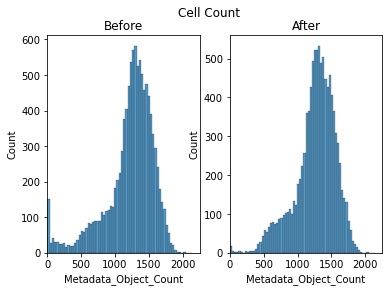

In [10]:
HepG2_Reduced_Tox, HepG2_Reduced_Tox_Cond = UTIL.remove_tox(
    HepG2_Reduced_Carsten_100_Mod, 
    key_col = ["Metadata_EOS", "Metadata_Plate"], 
    SD_Threshold = 2.5,  
    plot_distribution = True)

In [11]:
len(HepG2_Reduced_Tox["Metadata_EOS"].unique())

2349

# Raw % replication

In [12]:
HepG2_replicating, HepG2_corr_replicating_df = UTIL.remove_non_reproducible(
    HepG2_Reduced_Tox, 
    n_samples = 10000, 
    n_replicates = 4, 
    ID_col = "Metadata_EOS", 
    description = "Data_50")

| Description   |   Percent_Replicating |
|:--------------|----------------------:|
| Data_50       |                  77.5 |
Nonreplicating conditions removed with threshold 0.29
Old shape (10251, 637)
New shape (8166, 637)


/home/schmiedc/FMP_Docs/Projects/Bioactives_data/notebooks/utility_functions.py:390: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_replicating_df = corr_replicating_df.append({'Description': description,


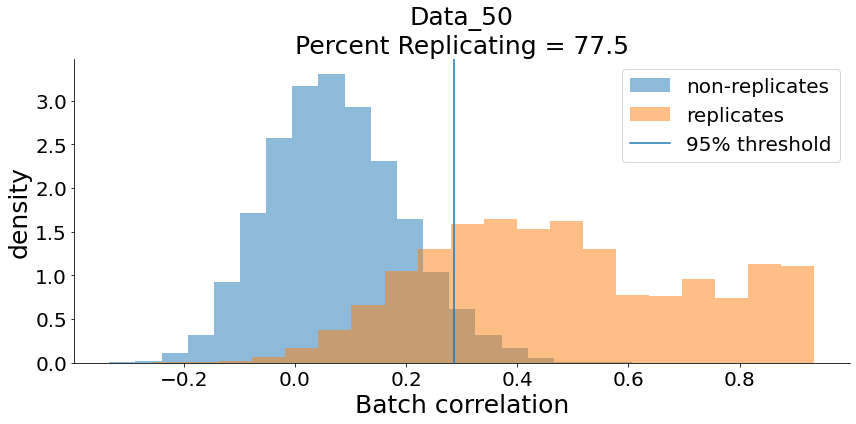

In [13]:
n_experiments = len(HepG2_corr_replicating_df)

plt.rcParams['figure.facecolor'] = 'white' # Enabling this makes the figure axes and labels visible in PyCharm Dracula theme
plt.figure(figsize=[12, n_experiments*6])

for i in range(n_experiments):
    plt.subplot(n_experiments, 1, i+1)
    plt.hist(HepG2_corr_replicating_df.loc[i,'Null_Replicating'], label='non-replicates', density=True, bins=20, alpha=0.5)
    plt.hist(HepG2_corr_replicating_df.loc[i,'Replicating'], label='replicates', density=True, bins=20, alpha=0.5)
    plt.axvline(HepG2_corr_replicating_df.loc[i,'Value_95'], label='95% threshold')
    plt.legend(fontsize=20)
    plt.title(
        f"{HepG2_corr_replicating_df.loc[i,'Description']}\n" +
        f"Percent Replicating = {HepG2_corr_replicating_df.loc[i,'Percent_Replicating']}",
        fontsize=25
    )
    plt.ylabel("density", fontsize=25)
    plt.xlabel("Batch correlation", fontsize=25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    sns.despine()
plt.tight_layout()

plt.savefig(figure_path + str(date.today()) + "_IMTM_HepG2_Percent_Replicating.pdf", 
            transparent=False, 
            bbox_inches='tight', 
            dpi = 600)

# Compute Median for Induction

Tox filtered

Remove only toxic compounds

Non Replicating compounds are not removed


In [14]:
## gets feature vector
Features_HepG2_Norm_Reduced = UTIL.get_feature_vector(HepG2_Reduced_Tox)

HepG2_Norm_Reduced_Median = pycytominer.consensus(
        profiles = HepG2_Reduced_Tox, # A file or pandas DataFrame of profile data
        replicate_columns = ["Metadata_EOS", "Metadata_Plate","Metadata_Concentration", "Metadata_Partner"], # Metadata columns indicating which replicates to collapse, defaults to [“Metadata_Plate”, “Metadata_Well”]
        operation = "median", # (str) – The method used to form consensus profiles, defaults to “median”
        features = Features_HepG2_Norm_Reduced, # (str, list) – The features to collapse, defaults to “infer”
)

In [15]:
len(HepG2_Norm_Reduced_Median["Metadata_EOS"].unique())

2349

# Remove compounds with low acitivity

In [16]:
key_col = ["Metadata_EOS", "Metadata_Plate", "Metadata_Partner"]

HepG2_active, HepG2_low_active = UTIL.remove_low_active(HepG2_Norm_Reduced_Median, 
                                                   key_col,
                                                   3.0, 
                                                   5.0)

print("HepG2 active:", len(HepG2_active["Metadata_EOS"].unique()))
print("HepG2 low-active:", len(HepG2_low_active["Metadata_EOS"].unique()))

HepG2 active: 676
HepG2 low-active: 1673


In [17]:
HepG2_low_active_EOS = pd.DataFrame(HepG2_low_active["Metadata_EOS"].unique(), columns = ["Metadata_EOS"])

filename_HepG2_low_active = output_path +  str(date.today()) + "_IMTM_HepG2_low-active.csv"
HepG2_low_active_EOS.to_csv(filename_HepG2_low_active, index = False)

## Filter non active compounds from non consensus dataframe

In [18]:
HepG2_Reduced_Tox_active = HepG2_Reduced_Tox[
    (HepG2_Reduced_Tox['Metadata_EOS'].isin(HepG2_active['Metadata_EOS']))]

# % Replicating after Induction filter

In [19]:
HepG2_active_replicating, HepG2_active_corr_replicating_df = UTIL.remove_non_reproducible(
    HepG2_Reduced_Tox_active, 
    n_samples = 10000, 
    n_replicates = 4, 
    ID_col = "Metadata_EOS", 
    description = "Data_50")

| Description   |   Percent_Replicating |
|:--------------|----------------------:|
| Data_50       |                  86.8 |
Nonreplicating conditions removed with threshold 0.43
Old shape (2790, 637)
New shape (2451, 637)


/home/schmiedc/FMP_Docs/Projects/Bioactives_data/notebooks/utility_functions.py:390: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_replicating_df = corr_replicating_df.append({'Description': description,


In [20]:
filename_HepG2_Norm_Reduced_Filtered = output_path + str(date.today()) + "_IMTM_HepG2_norm_reduced_filtered.csv"
HepG2_active_replicating.to_csv(filename_HepG2_Norm_Reduced_Filtered, index = False)

In [21]:
# save non replicating compounds
HepG2_non_replicating = HepG2_Reduced_Tox_active[
    (~HepG2_Reduced_Tox_active['Metadata_EOS'].isin(HepG2_active_replicating['Metadata_EOS']))]

HepG2_non_replicating_EOS = pd.DataFrame(HepG2_non_replicating["Metadata_EOS"].unique(), columns = ["Metadata_EOS"])

filename_HepG2_non_replicating = output_path +  str(date.today()) + "_IMTM_HepG2_non-replicating.csv"
HepG2_non_replicating_EOS.to_csv(filename_HepG2_non_replicating, index = False)

In [22]:
len(HepG2_non_replicating['Metadata_EOS'].unique())

89

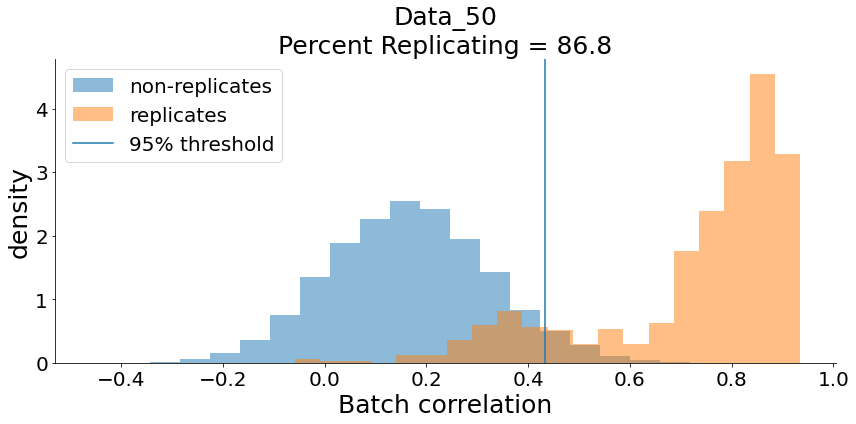

In [23]:
# plot % replicating
corr_replicating_df = HepG2_active_corr_replicating_df

n_experiments = len(corr_replicating_df)


plt.rcParams['figure.facecolor'] = 'white' # Enabling this makes the figure axes and labels visible in PyCharm Dracula theme
plt.figure(figsize=[12, n_experiments*6])

for i in range(n_experiments):
    plt.subplot(n_experiments, 1, i+1)
    plt.hist(corr_replicating_df.loc[i,'Null_Replicating'], label='non-replicates', density=True, bins=20, alpha=0.5)
    plt.hist(corr_replicating_df.loc[i,'Replicating'], label='replicates', density=True, bins=20, alpha=0.5)
    plt.axvline(corr_replicating_df.loc[i,'Value_95'], label='95% threshold')
    plt.legend(fontsize=20)
    plt.title(
        f"{corr_replicating_df.loc[i,'Description']}\n" +
        f"Percent Replicating = {corr_replicating_df.loc[i,'Percent_Replicating']}",
        fontsize=25
    )
    plt.ylabel("density", fontsize=25)
    plt.xlabel("Batch correlation", fontsize=25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    sns.despine()
plt.tight_layout()

plt.savefig(figure_path + str(date.today()) + "_IMTM_HepG2_Percent_Replicating_Induction_Filter.pdf", 
            transparent=False, 
            bbox_inches='tight', 
            dpi = 600)# 

# Consensus Tox, Induction, Replication Filter

In [24]:
## gets feature vector
Features_HepG2_Norm_Reduced_Filtered = UTIL.get_feature_vector(HepG2_active_replicating)

HepG2_Norm_Reduced_Filtered_Median = pycytominer.consensus(
        profiles = HepG2_active_replicating, # A file or pandas DataFrame of profile data
        replicate_columns = ["Metadata_EOS", "Metadata_Plate", "Metadata_Concentration", "Metadata_Partner"], # Metadata columns indicating which replicates to collapse, defaults to [“Metadata_Plate”, “Metadata_Well”]
        operation = "median", # (str) – The method used to form consensus profiles, defaults to “median”
        features = Features_HepG2_Norm_Reduced, # (str, list) – The features to collapse, defaults to “infer”
)

In [25]:
len(HepG2_Norm_Reduced_Filtered_Median["Metadata_EOS"].unique())

587

In [26]:
filename_HepG2_Norm_Reduced_Filtered_Median = output_path + str(date.today()) + "_IMTM_HepG2_norm_reduced_filtered_median.csv"
HepG2_Norm_Reduced_Filtered_Median.to_csv(filename_HepG2_Norm_Reduced_Filtered_Median, index = False)

# Get non-active compounds

In [27]:
HepG2_non_replicating_merge = pd.merge(HepG2_active,
                                HepG2_Norm_Reduced_Filtered_Median,
                                on = ["Metadata_EOS"],
                                how = "outer",
                                indicator = True)

HepG2_non_replicating = HepG2_non_replicating_merge[
    HepG2_non_replicating_merge["_merge"] == 'left_only'].dropna(axis='columns')

In [28]:
HepG2_non_replicating_merge['_merge'].value_counts()

both          683
left_only      89
right_only      0
Name: _merge, dtype: int64